# Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the dataset

In [2]:
data= pd.read_csv("C:/Users/nitsa/Documents/IIT Bombay/Placement/Deep Learning Projects/Car sale prediction using ANN/Car_Purchasing_Data.csv")
data.head(10)

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
5,Carla Hester,mi@Aliquamerat.edu,Liberia,1,56.824893,68499.85162,14179.472440,428485.3604,56611.99784
6,Griffin Rivera,vehicula@at.co.uk,Syria,1,46.607315,39814.52200,5958.460188,326373.1812,28925.70549
7,Orli Casey,nunc.est.mollis@Suspendissetristiqueneque.co.uk,Czech Republic,1,50.193016,51752.23445,10985.696560,629312.4041,47434.98265
8,Marny Obrien,Phasellus@sedsemegestas.org,Armenia,0,46.584745,58139.25910,3440.823799,630059.0274,48013.61410
9,Rhonda Chavez,nec@nuncest.com,Somalia,1,43.323782,53457.10132,12884.078680,476643.3544,38189.50601


# Visulazing the dataset

In [3]:
#checking the data types in every column
print(data.dtypes)

Customer Name           object
Customer e-mail         object
Country                 object
Gender                   int64
Age                    float64
Annual Salary          float64
Credit Card Debt       float64
Net Worth              float64
Car Purchase Amount    float64
dtype: object


In [4]:
#checking which variables are useful by showing their contained unique values and null entries 
for col in data.columns.values:
   vals = pd.unique(data[col])
   print(col + ' has ' + str(len(vals)) + ' unique values and '+ str(data[col].isnull().sum()) + ' null entries')
   if len(vals) < 20:
     lst_str=''
     for n in range(0, len(vals)):
       lst_str= lst_str + str(vals[n]) + ','

Customer Name has 498 unique values and 0 null entries
Customer e-mail has 500 unique values and 0 null entries
Country has 211 unique values and 0 null entries
Gender has 2 unique values and 0 null entries
Age has 500 unique values and 0 null entries
Annual Salary has 500 unique values and 0 null entries
Credit Card Debt has 500 unique values and 0 null entries
Net Worth has 500 unique values and 0 null entries
Car Purchase Amount has 500 unique values and 0 null entries


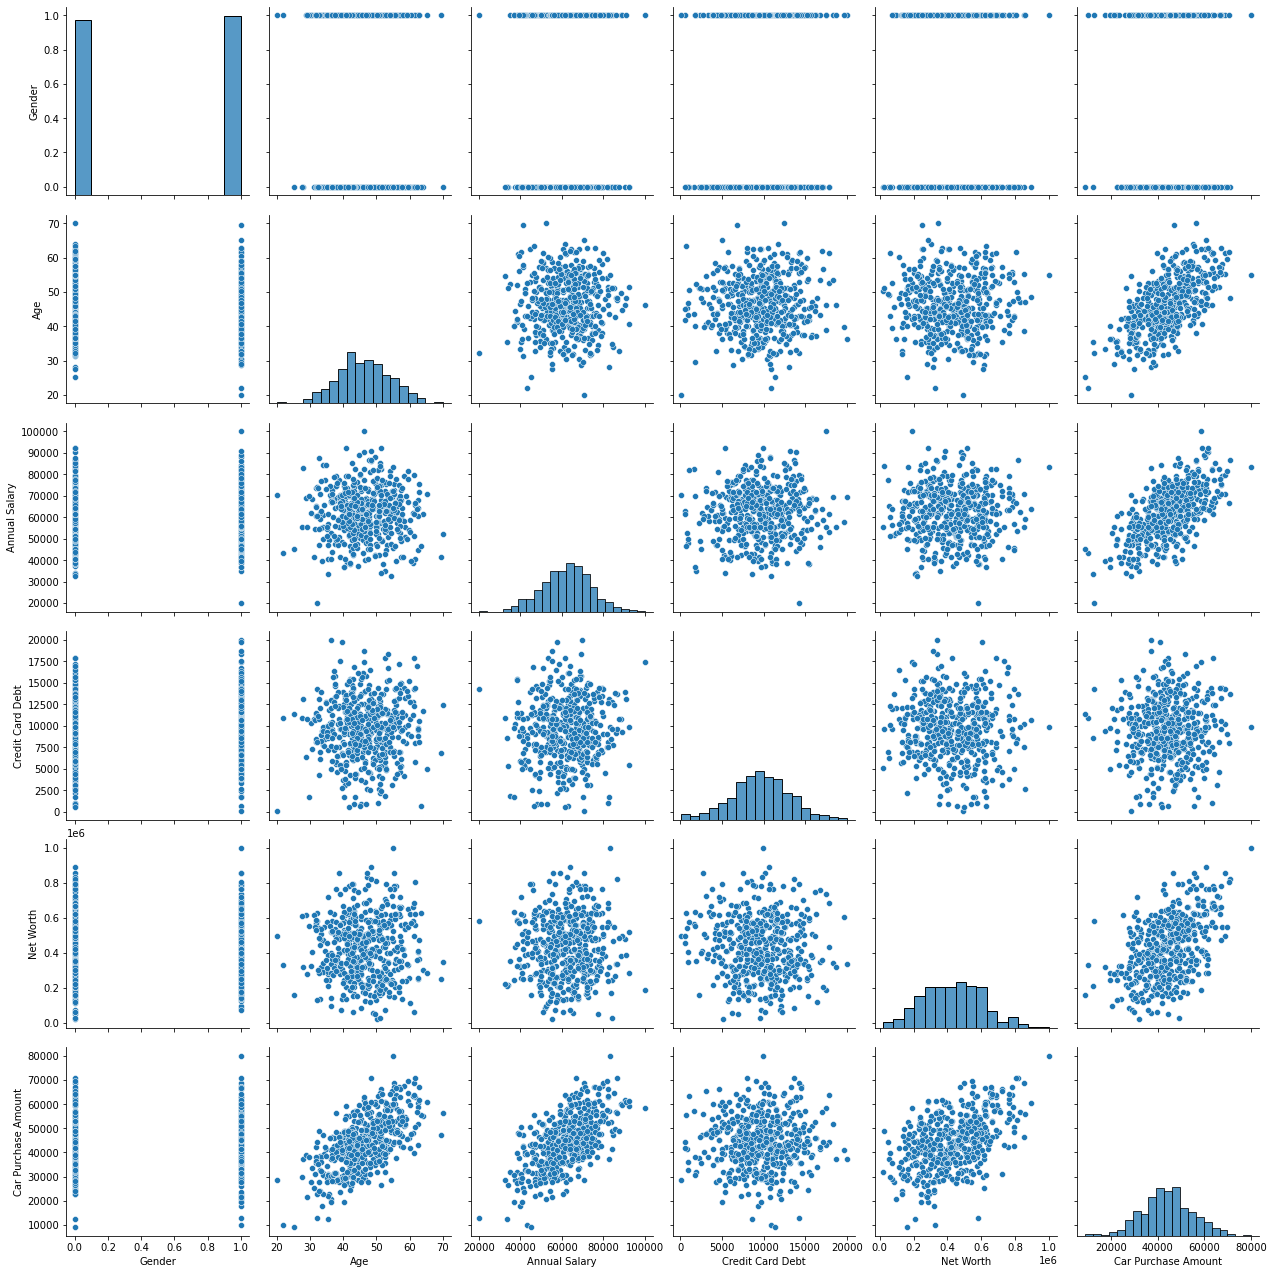

In [5]:
sns.pairplot(data, height=3, aspect=1)

# Data cleaning

In [6]:
X = data.drop(['Customer Name', 'Customer e-mail', 'Country', 'Car Purchase Amount'], axis = 1)
Y = data['Car Purchase Amount']
Y

0      35321.45877
1      45115.52566
2      42925.70921
3      67422.36313
4      55915.46248
          ...     
495    48901.44342
496    31491.41457
497    64147.28888
498    45442.15353
499    45107.22566
Name: Car Purchase Amount, Length: 500, dtype: float64

In [7]:
X.shape

(500, 5)

In [8]:
Y.shape

(500,)

# Spliting the data into training and testing dataset

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

# Training the model

In [10]:
import tensorflow.keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler

model = Sequential()
model.add(Dense(25, input_dim=5, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='linear'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                150       
                                                                 
 dense_1 (Dense)             (None, 25)                650       
                                                                 
 dense_2 (Dense)             (None, 1)                 26        
                                                                 
Total params: 826
Trainable params: 826
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', loss='mean_squared_error')
epochs_hist = model.fit(X_train, Y_train, epochs=20, batch_size=25,  verbose=1, validation_split=0.2)

Epoch 1/20
13/13 [==============================] - 1s 14ms/step - loss: 589293952.0000 - val_loss: 361212448.0000
Epoch 2/20
13/13 [==============================] - 0s 4ms/step - loss: 228146208.0000 - val_loss: 156776896.0000
Epoch 3/20
13/13 [==============================] - 0s 4ms/step - loss: 141563552.0000 - val_loss: 100628496.0000
Epoch 4/20
13/13 [==============================] - 0s 3ms/step - loss: 111042264.0000 - val_loss: 82987704.0000
Epoch 5/20
13/13 [==============================] - 0s 4ms/step - loss: 89107224.0000 - val_loss: 59270356.0000
Epoch 6/20
13/13 [==============================] - 0s 4ms/step - loss: 66767816.0000 - val_loss: 42485288.0000
Epoch 7/20
13/13 [==============================] - 0s 4ms/step - loss: 52266692.0000 - val_loss: 40943512.0000
Epoch 8/20
13/13 [==============================] - 0s 3ms/step - loss: 51751880.0000 - val_loss: 40333828.0000
Epoch 9/20
13/13 [==============================] - 0s 3ms/step - loss: 52297396.0000 - val_loss

# Evaluating the model

In [12]:
print(epochs_hist.history.keys())

dict_keys(['loss', 'val_loss'])


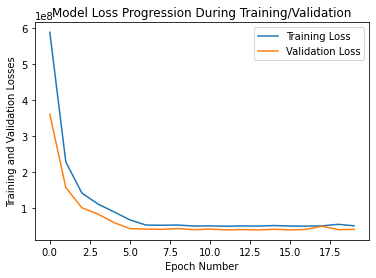

In [13]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])

plt.title('Model Loss Progression During Training/Validation')
plt.ylabel('Training and Validation Losses')
plt.xlabel('Epoch Number')
plt.legend(['Training Loss', 'Validation Loss'])

In [14]:
X_Testing = np.array([[1, 43, 53798.55, 11160.35, 638467.17]])
y_predict = model.predict(X)
y_predict

16/16 [==============================] - 0s 1ms/step


array([[38565.773],
       [47510.83 ],
       [45808.562],
       [54305.582],
       [44928.227],
       [45632.457],
       [28558.33 ],
       [44663.84 ],
       [47047.66 ],
       [39324.81 ],
       [53221.277],
       [35923.68 ],
       [31337.41 ],
       [45954.695],
       [42378.98 ],
       [45073.234],
       [41780.17 ],
       [41891.086],
       [38843.016],
       [43577.01 ],
       [44304.562],
       [41039.703],
       [46191.547],
       [47109.87 ],
       [48621.465],
       [37370.73 ],
       [51165.25 ],
       [39740.832],
       [57584.64 ],
       [47121.477],
       [27862.967],
       [47224.   ],
       [59193.496],
       [46987.395],
       [39895.67 ],
       [47000.074],
       [35160.203],
       [29753.092],
       [32515.766],
       [52683.6  ],
       [47038.785],
       [39902.445],
       [34044.984],
       [33476.094],
       [53424.484],
       [60767.773],
       [36673.508],
       [35122.188],
       [41101.055],
       [51956.04 ],
